In [1]:
#Install and import Required Library for the Expenses_Tracker


In [ ]:
#for installing library
pip install pandas # for importing the data
pip install numpy # for dealing with numrical data calculations
pip install matplotlib # creating charts,plots,2D,3D etc..a

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For intercating with systen
import os

In [2]:
#importing the data
data = pd.read_csv("expenses.csv")
data.head()

,Date,Category,Amount,Description
0,10-06-2025,Food,150,Pizza at Dominos
1,11-06-2025,Transport,50,Rickshaw fare
2,12-06-2025,Rent,5000,June Rent
3,12-06-2025,Utilities,200,Electricity Bill


In [25]:
#converting the date foramte from dd-mm-yyyy to yyyy-mm-dd

In [4]:
data['Date']=pd.to_datetime(data['Date'],format = '%d-%m-%Y')


In [5]:
data

,Date,Category,Amount,Description
0,2025-06-10,Food,150,Pizza at Dominos
1,2025-06-11,Transport,50,Rickshaw fare
2,2025-06-12,Rent,5000,June Rent
3,2025-06-12,Utilities,200,Electricity Bill


# 1. Total Spending Overview
Display the total amount spent overall.
Identify the highest and lowest expense entries.


In [6]:
def total_spending_overview(data):
    # Total spent
    total_spent = data['Amount'].sum()
    print(f"\nTotal Amount Spent: ₹{total_spent}")

    # Highest expense
    max_expense = data.loc[data['Amount'].idxmax()]
    print(f"Highest Expense: ₹{max_expense['Amount']} on {max_expense['Date']} - {max_expense['Category']} ({max_expense['Description']})")

    # Lowest expense
    min_expense = data.loc[data['Amount'].idxmin()]
    print(f"Lowest Expense: ₹{min_expense['Amount']} on {min_expense['Date']} - {min_expense['Category']} ({min_expense['Description']})")


In [7]:
total_spending_summary=total_spending_overview(data)
print(total_spending_summary)


Total Amount Spent: ₹5400
Highest Expense: ₹5000 on 2025-06-12 00:00:00 - Rent (June Rent)
Lowest Expense: ₹50 on 2025-06-11 00:00:00 - Transport (Rickshaw fare)
None


# 2. Category-wise Analysis
·        Group expenses by Category and show:
·         Total amount spent per category
·         Count of transactions per category
·         Percentage of total spent in each category (rounded to 2 decimal places)


In [8]:
def category_wise(data):
    grouped = data.groupby('category')['Amount'].agg(['sum','count'])
    
    #calculate percentage
    total_spent = data['Amount'].sum()
    grouped['percentage'] = (grouped['sum']/total_spent)*100
    grouped['percentage'] = grouped['percentage'].rount(2)

In [9]:
def category_analysis(data):
    # Group by category
    grouped = data.groupby("Category")["Amount"].agg(["sum", "count"])

    # Calculate percentage
    total_spent = data["Amount"].sum()
    grouped["percentage"] = (grouped["sum"] / total_spent) * 100
    grouped["percentage"] = grouped["percentage"].round(2)

    # Display results
    print("Category-wise Analysis")
    print(grouped)

In [10]:
category_analysis(data)

Category-wise Analysis
            sum  count  percentage
Category                          
Food        150      1        2.78
Rent       5000      1       92.59
Transport    50      1        0.93
Utilities   200      1        3.70


# 3.% of total spending by each category.

In [11]:
def plot_expense_pie_chart(data):
    # Group by category and sum the amounts
    category_sums = data.groupby("Category")["Amount"].sum()

    # Define color palette (optional: pick any)
    colors = plt.cm.Paired(range(len(category_sums)))

    # Plot pie chart
    plt.figure(figsize=(6,6))
    wedges, texts, autotexts = plt.pie(
        category_sums,
        labels=category_sums.index,     # This shows the category names on the chart
        autopct='%1.1f%%',
        colors=colors,
        startangle=140
    )

    # Title
    plt.title("Expense Breakdown by Category")

    # Legend (to show color-code if labels overlap)
    plt.legend(wedges, category_sums.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Make it a perfect circle
    plt.axis('equal')

    # Show chart
    plt.tight_layout()
    plt.show()


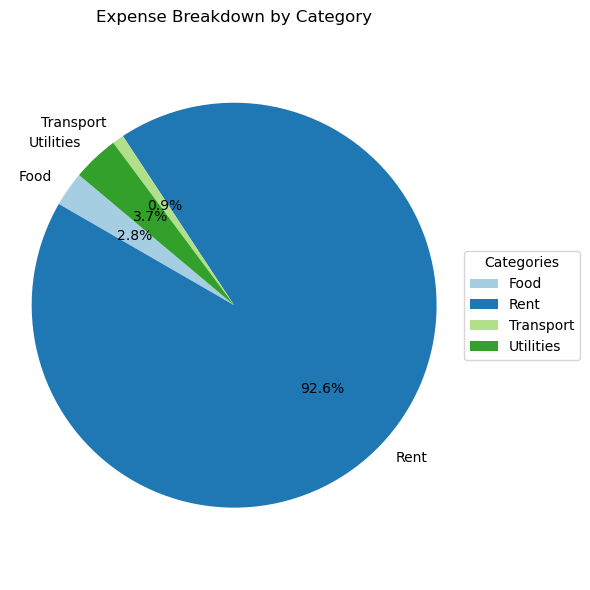

In [12]:
plot_expense_pie_chart(data)

# 4.Adding support to filter expenses by date range.


In [30]:
def filter_expenses_by_date_range(data):
    print("Filter Expenses by Date Range")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")

    # Convert to datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Filter
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

    if filtered_data.empty:
        print("No expenses found in this date range.")
    else:
        print(f"\nFiltered {len(filtered_data)} records:")
        print(filtered_data)

    return filtered_data


In [31]:
filter_expenses_by_date_range(data)

Filter Expenses by Date Range
Enter start date (YYYY-MM-DD): 2025-06-18
Enter end date (YYYY-MM-DD): 2025-06-19
No expenses found in this date range.


,Date,Category,Amount,Description


# 5.user can input to the existing file

In [17]:
def add_new_expense(data, filename="expenses.csv"):
    print("Add a New Expense")
    date_input = input("Enter date (YYYY-MM-DD): ")
    date = pd.to_datetime(date_input)  # ✅ Convert to datetime
    category = input("Enter category: ")
    amount = float(input("Enter amount: "))
    description = input("Enter description: ")

    new_entry = pd.DataFrame([[date, category, amount, description]], columns=data.columns)
    updated_data = pd.concat([data, new_entry], ignore_index=True)
    updated_data.to_csv(filename, index=False)

    print("New expense added successfully.")
    return updated_data

In [18]:
add_new_expense(data, filename="expenses.csv")

Add a New Expense
Enter date (YYYY-MM-DD): 2025-06-14
Enter category: Mobile
Enter amount: 250
Enter description: monthly currency bill
New expense added successfully.


,Date,Category,Amount,Description
0,2025-06-10,Food,150.0,Pizza at Dominos
1,2025-06-11,Transport,50.0,Rickshaw fare
2,2025-06-12,Rent,5000.0,June Rent
3,2025-06-12,Utilities,200.0,Electricity Bill
4,2025-06-14,Mobile,250.0,monthly currency bill


# 6.Summary report

In [21]:
def export_summary_report(data, filename="summary_report.csv"):
    grouped = data.groupby("Category")["Amount"].agg(["sum", "count"])
    total_spent = data["Amount"].sum()
    grouped["percentage"] = (grouped["sum"] / total_spent) * 100
    grouped["percentage"] = grouped["percentage"].round(2)

    grouped.to_csv(filename)
    print(f"Summary report exported to {filename}.")


In [24]:
export_summary_report(data)


Summary report exported to summary_report.csv.
